# SUPPORT VECTOR MACHINE (SVM)

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You
may want to tune the hyperparameters using small validation sets to speed up the
process. What accuracy can you reach?

NB: This exercise was gotten from "Hands on Machine Learning by Aurelien Geron" (Chapter 5)

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [14]:
# Import MNIST data
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [15]:
# Seperate the labels and target using the keys
x_data , y_target = mnist['data'] , mnist['target']

In [16]:
#determine the shape of x_data
x_data.shape

(70000, 784)

In [17]:
#determine the shape of y_target
y_target.shape

(70000,)

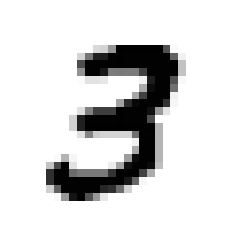

In [18]:
# The Images in this dataset has 784 features (28x28 pixels)
# We can visuaize an image, by reshaping
sample_digit = x_data[7]
sample_image = sample_digit.reshape(28,28)

plt.imshow(sample_image, cmap="binary")
plt.axis("off")
plt.show()

In [19]:
# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(x_data)

# Since this data set has been shuffled, we can select a percentage of the data for tuning the hyperparameter 
X_sample = X[:10000]
X_sample.shape

(10000, 784)

In [ ]:
# Tune SVM Hyperparmeters using Grid search
from sklearn.model_selection import GridSearchCV
from 
